# Etape 1
## effectuez une analyse exploratoire des fichiers des données

### Résultats attendus

Un DataFrame central, issu d’une jointure entre les fichiers de départ.

Des cellules au sein du notebook pour calculer des statistiques descriptives sur les fichiers de départ et le fichier central, dans l’objectif de faire ressortir des différences clés entre les employés.

Des cellules au sein du notebook pour générer des graphiques, dans l’objectif de faire ressortir des différences clés entre les employés.

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', None)

### lecture des 3 fichiers csv 

In [2]:
df_sirh = pd.read_csv("../Data/extrait_sirh.csv")
df_eval = pd.read_csv("../Data/extrait_eval.csv")
df_sondage = pd.read_csv("../Data/extrait_sondage.csv")

In [3]:
df_sirh.info()
df_eval.info()
df_sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB
<

### Display

In [4]:
print('Fichier SIRH')
display(df_sirh.head())

print('Fichier Eval')
display(df_eval.head())

print('Fichier Sondage')
display(df_sondage.head())

Fichier SIRH


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


Fichier Eval


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


Fichier Sondage


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


### Fusion des données
Recherche de clef et ensuite fusion

In [5]:
df_sondage = df_sondage.rename(columns={'code_sondage': 'id_employee'})
df_eval = df_eval.rename(columns={'eval_number': 'id_employee'})

df_sondage['id_employee'] = df_sondage['id_employee'].astype(int)
df_eval['id_employee'] = df_eval['id_employee'].astype(str).str.replace('E_', '').astype(int)


In [6]:
tableau_complet = df_sirh.merge(df_eval, on='id_employee', how='inner') \
                  .merge(df_sondage, on='id_employee', how='inner')

# Vérification du résultat
print({tableau_complet.shape})
display(tableau_complet.head())

{(1470, 32)}


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4,2,3,2,4,1,1,3,Oui,11 %,Oui,0,0,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7,3,2,2,2,4,3,4,Non,23 %,Non,1,3,1,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0,4,2,1,3,2,3,3,Oui,15 %,Oui,0,3,1,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7,4,3,1,3,3,3,3,Oui,11 %,Non,0,3,1,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2,1,3,1,2,4,3,3,Non,12 %,Non,1,3,1,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [7]:
display(tableau_complet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   int64 
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   nombre_heures_travailless                  1470 non-null   int64 
 9   annee_experience_totale                    1470 non-null   int64 
 10  annees_dans_l_entreprise            

None

In [8]:
tableau_complet = tableau_complet.rename(columns={'augementation_salaire_precedente': 'augmentation_salaire_pourcentage'})


tableau_complet['augmentation_salaire_pourcentage'] = tableau_complet['augmentation_salaire_pourcentage'].astype(str).str.replace(' %', '').astype(int)

print("Nouveau type :", tableau_complet['augmentation_salaire_pourcentage'].dtype)

Nouveau type : int64


In [9]:
# Liste explicite des colonnes à convertir en catégorie
colonnes_categories = [
    'genre', 
    'statut_marital', 
    'departement', 
    'poste', 
    'heure_supplementaires', 
    'a_quitte_l_entreprise', 
    'domaine_etude', 
    'ayant_enfants', 
    'frequence_deplacement'
]

# Boucle pour convertir chaque colonne
for col in colonnes_categories:
    tableau_complet[col] = tableau_complet[col].astype('category')

# On vérifie que le changement a bien eu lieu
tableau_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   id_employee                                1470 non-null   int64   
 1   age                                        1470 non-null   int64   
 2   genre                                      1470 non-null   category
 3   revenu_mensuel                             1470 non-null   int64   
 4   statut_marital                             1470 non-null   category
 5   departement                                1470 non-null   category
 6   poste                                      1470 non-null   category
 7   nombre_experiences_precedentes             1470 non-null   int64   
 8   nombre_heures_travailless                  1470 non-null   int64   
 9   annee_experience_totale                    1470 non-null   int64   
 10  annees_dans_

In [10]:
display(tableau_complet.head(10))

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augmentation_salaire_pourcentage,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4,2,3,2,4,1,1,3,Oui,11,Oui,0,0,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7,3,2,2,2,4,3,4,Non,23,Non,1,3,1,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0,4,2,1,3,2,3,3,Oui,15,Oui,0,3,1,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7,4,3,1,3,3,3,3,Oui,11,Non,0,3,1,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2,1,3,1,2,4,3,3,Non,12,Non,1,3,1,2,1,Transformation Digitale,Y,Occasionnel,2,2
5,8,32,M,3068,Célibataire,Consulting,Consultant,0,80,8,7,7,4,3,1,4,3,2,3,Non,13,Non,0,2,1,2,2,Infra & Cloud,Y,Frequent,3,6
6,10,59,F,2670,Marié(e),Consulting,Consultant,4,80,12,1,0,3,4,1,1,1,2,4,Oui,20,Non,3,3,1,3,3,Transformation Digitale,Y,Occasionnel,0,0
7,11,30,M,2693,Divorcé(e),Consulting,Consultant,1,80,1,1,0,4,3,1,3,2,3,4,Non,22,Non,1,2,1,24,1,Infra & Cloud,Y,Occasionnel,0,0
8,12,38,M,9526,Célibataire,Consulting,Tech Lead,0,80,10,9,7,4,2,3,3,2,3,4,Non,21,Non,0,2,1,23,3,Infra & Cloud,Y,Frequent,1,8
9,13,36,M,5237,Marié(e),Consulting,Manager,6,80,17,7,7,3,3,2,3,2,2,3,Non,13,Non,2,3,1,27,3,Transformation Digitale,Y,Occasionnel,7,7


In [11]:
manquants = tableau_complet.isna().sum()
manquants[manquants > 0]

Series([], dtype: int64)

In [12]:
# Nombre de lignes identiques
tableau_complet.duplicated().sum()

np.int64(0)

In [13]:
# Liste des colonnes constantes
[col for col in tableau_complet.columns if tableau_complet[col].nunique() == 1]

['nombre_heures_travailless',
 'nombre_employee_sous_responsabilite',
 'ayant_enfants']

In [14]:
tableau_complet = tableau_complet.drop(columns=['nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'ayant_enfants'])

### matrice de corrélation 


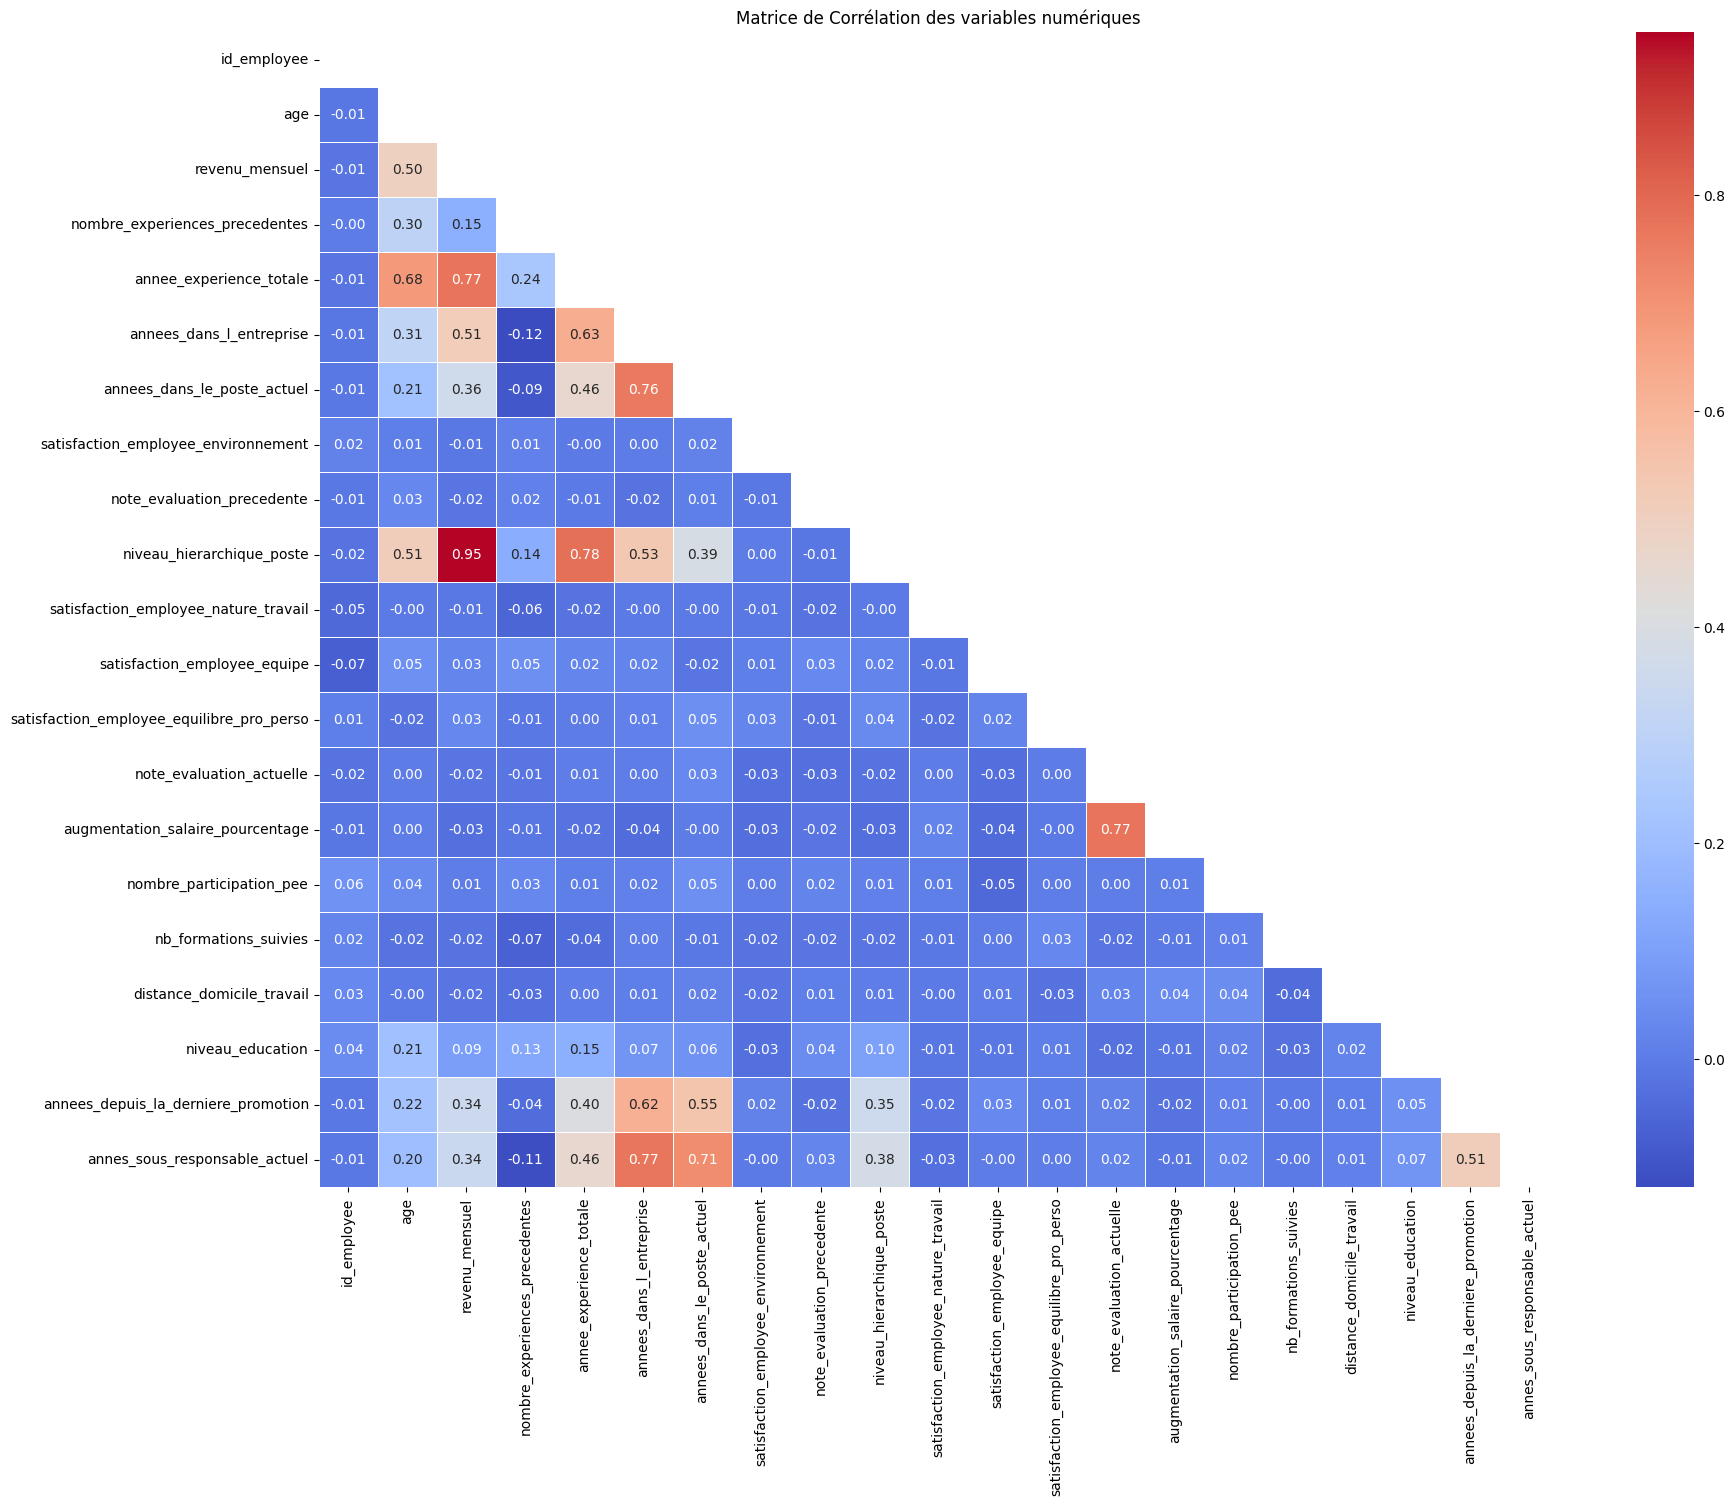

In [15]:

df_numerique = tableau_complet.select_dtypes(include=['number'])

# la matrice
correlation_matrix = df_numerique.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Heatmap
plt.figure(figsize=(20, 15)) 
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,         
            cmap='coolwarm',    
            fmt=".2f",          
            linewidths=0.5)    

plt.title("Matrice de Corrélation des variables numériques")
plt.show()

Seuil à 0,8

On constate une forte corrélation entre le niveau hierarchique du poste et le revenu_mensuel mais les 2 features me semblent tout de même interessantes et n'apportent pas la même information.

In [16]:
# 1. Moyennes par groupe
moyennes = tableau_complet.groupby('a_quitte_l_entreprise').mean(numeric_only=True).T.add_prefix('Moy_')

# 2. Ecart-types par groupe
std = tableau_complet.groupby('a_quitte_l_entreprise').std(numeric_only=True).T.add_prefix('Std_')

# 3. Fusion des deux tableaux
comparatif = pd.concat([moyennes, std], axis=1)

# 4. Calcul de la différence (Ceux qui restent - Ceux qui partent)
comparatif['Diff'] = comparatif['Moy_Non'] - comparatif['Moy_Oui']

# Affichage trié par la différence
display(comparatif.sort_values('Diff', ascending=False))

C:\Users\ethan\AppData\Local\Temp\ipykernel_4848\3255847072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moyennes = tableau_complet.groupby('a_quitte_l_entreprise').mean(numeric_only=True).T.add_prefix('Moy_')
C:\Users\ethan\AppData\Local\Temp\ipykernel_4848\3255847072.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std = tableau_complet.groupby('a_quitte_l_entreprise').std(numeric_only=True).T.add_prefix('Std_')


a_quitte_l_entreprise,Moy_Non,Moy_Oui,Std_Non,Std_Oui,Diff
revenu_mensuel,6832.739659,4787.092827,4818.208001,3640.210367,2045.646832
id_employee,1027.656123,1010.345992,606.217074,580.750572,17.310132
age,37.561233,33.607595,8.888360,9.689350,3.953638
annee_experience_totale,11.862936,8.244726,7.760719,7.169204,3.618210
annees_dans_l_entreprise,7.369019,5.130802,6.096298,5.949984,2.238217
annees_dans_le_poste_actuel,4.484185,2.902954,3.649402,3.174827,1.581231
annes_sous_responsable_actuel,4.367397,2.852321,3.594116,3.143349,1.515076
niveau_hierarchique_poste,2.145985,1.637131,1.117933,0.940594,0.508855
nombre_participation_pee,0.845093,0.527426,0.841985,0.856361,0.317667
satisfaction_employee_nature_travail,2.778589,2.468354,1.093277,1.118058,0.310234


C:\Users\ethan\AppData\Local\Temp\ipykernel_4848\233042905.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=tableau_complet, x='a_quitte_l_entreprise', y='revenu_mensuel', showfliers=False, palette=palette_coherente)
C:\Users\ethan\AppData\Local\Temp\ipykernel_4848\233042905.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 1], data=tableau_complet, x='a_quitte_l_entreprise', y='distance_domicile_travail', showfliers=False, palette=palette_coherente)


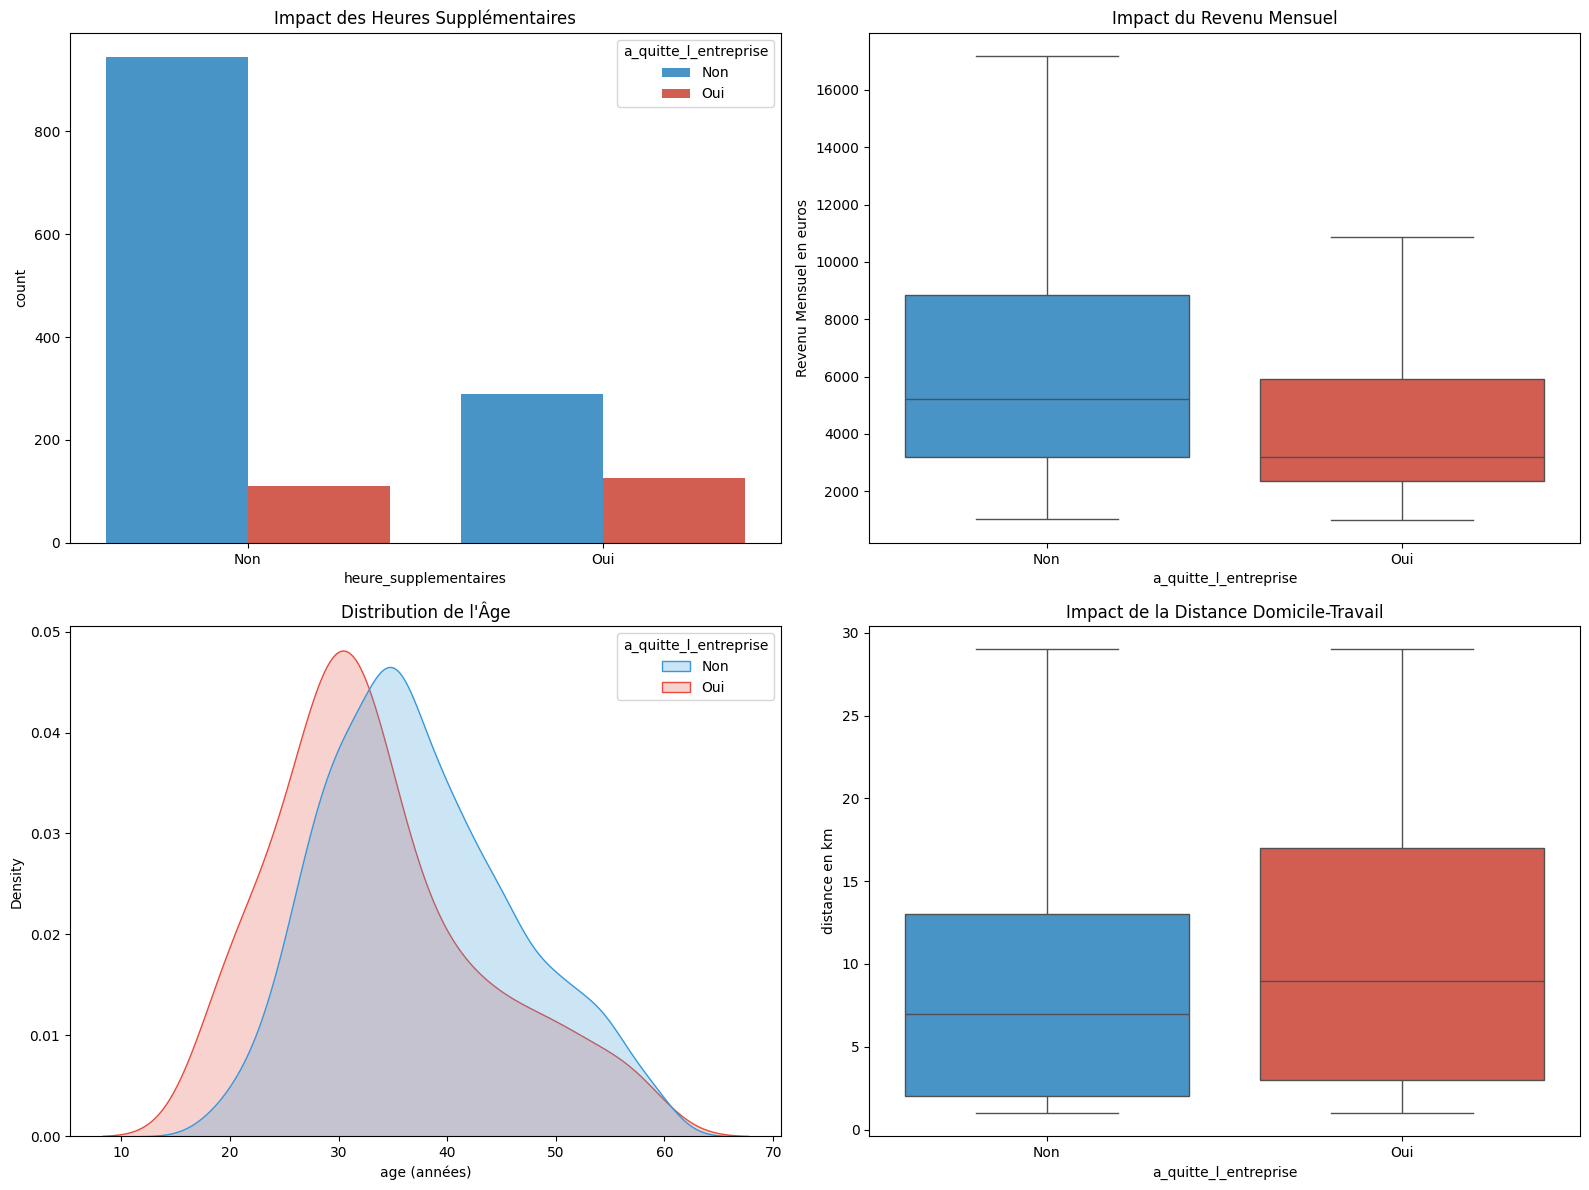

In [17]:
# Correction du dictionnaire pour correspondre à "Oui" et "Non"
palette_coherente = {"Non": "#3498db", "Oui": "#e74c3c"}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Graphique 1 : Heures Supplémentaires
sns.countplot(ax=axes[0, 0], data=tableau_complet, x='heure_supplementaires', hue='a_quitte_l_entreprise', palette=palette_coherente)
axes[0, 0].set_title("Impact des Heures Supplémentaires")

# Graphique 2 : Revenu Mensuel
# Correction : déplacement de Ylabel vers set_ylabel()
sns.boxplot(ax=axes[0, 1], data=tableau_complet, x='a_quitte_l_entreprise', y='revenu_mensuel', showfliers=False, palette=palette_coherente)
axes[0, 1].set_title("Impact du Revenu Mensuel")
axes[0, 1].set_ylabel("Revenu Mensuel en euros")

# Graphique 3 : Âge
# Correction : déplacement de xlabel vers set_xlabel()
sns.kdeplot(ax=axes[1, 0], data=tableau_complet, x='age', hue='a_quitte_l_entreprise', fill=True, palette=palette_coherente, common_norm=False)
axes[1, 0].set_title("Distribution de l'Âge")
axes[1, 0].set_xlabel("age (années)")

# Graphique 4 : Distance
# Correction : déplacement de ylabel vers set_ylabel()
sns.boxplot(ax=axes[1, 1], data=tableau_complet, x='a_quitte_l_entreprise', y='distance_domicile_travail', showfliers=False, palette=palette_coherente)
axes[1, 1].set_title("Impact de la Distance Domicile-Travail")
axes[1, 1].set_ylabel("distance en km")

plt.tight_layout()
plt.show()

fig.savefig("../Graphs/analyse_exploratoire.png", bbox_inches='tight', dpi=300)

In [18]:
tableau_complet.to_csv("../Data/Partie_1_clean.csv", index=False)